# 	INTELIGENCIA ARTIFICIAL (1INF24) 2024-2


## Laboratorio 4: Algoritmos de Regresión

## Indicaciones generales:

Indicaciones generales:

- Duración: **120 minutos (2 horas)**.
- **Las respuestas deben ser precisas**, no se considerará puntaje a respuestas que no contesten a lo solicitado.
- Subir el cuadernillo con el nombre **Lab4_código.ipynb**, donde **código** es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso de comentarios relevantes.
- Se puede hacer uso del **material del curso**.
- Cualquier indicio de **plagio** o uso de **IA** resultará en la anulación de la prueba.

## Objetivos:
- Evaluar y comparar el desempeño de diferentes algoritmos de regresión.

# Explicación del caso

Usted recibe un conjunto de datos que incluye características demográficas, económicas y sanitarias de diferentes países desde el año 2000 hasta el 2015.

El objetivo de este laboratorio es evaluar modelos de regresión para predecir la esperanza de vida de personas de un pais dado,  descrito por sus características listadas en la tabla de abajo. <font color='blue'>El modelo debe poder ser aplicanle incluso en paises que no son parte del conjunto de  entrenamiento</font>

VARIABLE | DESCRIPCIÓN | TIPO
---------|-------------|-----
**Country** | País | Categórica
**Year** | Año del registro | Numérica
**Status** | Estado del país (Desarrollado o en desarrollo) | Categórica
**Life expectancy** | Esperanza de vida en años | Numérica
**Adult Mortality** | Probabilidad de morir entre 15 y 60 años por cada 1,000 habitantes | Numérica
**under-one deaths** | Muertes de menores de 1 año por cada 1,000 habitantes | Numérica
**Alcohol** | Consumo de alcohol per cápita (litros de alcohol puro) | Numérica
**Percentage expenditure** | Gasto en salud como % del PIB per cápita | Numérica
**Hepatitis B** | Cobertura de inmunización contra la hepatitis B (% en niños de 1 año) | Numérica
**Measles** | Casos de sarampión por cada 1,000 habitantes | Numérica
**BMI** | Índice de masa corporal promedio | Numérica
**Under-five deaths** | Muertes de menores de 5 años por cada 1,000 habitantes | Numérica
**Polio** | Cobertura de inmunización contra la polio (% en niños de 1 año) | Numérica
**Total expenditure** | Gasto gubernamental total en salud como % del gasto total | Numérica
**Diphtheria** | Cobertura de inmunización DTP3 (% en niños de 1 año) | Numérica
**HIV/AIDS** | Muertes por VIH/SIDA por cada 1,000 nacidos vivos (0–4 años) | Numérica
**GDP** | Producto Interno Bruto per cápita en USD | Numérica
**Population** | Población total del país | Numérica
**Thinness 10-19 years** | Prevalencia de delgadez en niños/adolescentes de 10 a 19 años (%) | Numérica
**Thinness 5-9 years** | Prevalencia de delgadez en niños de 5 a 9 años (%) | Numérica
**Income composition of resources** | Índice de desarrollo humano por composición de ingresos (0 a 1) | Numérica
**Schooling** | Años promedio de escolaridad | Numérica


In [ ]:
# Importación de librerías
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression
from sklearn.tree import DecisionTreeRegressor   # Decision Trees regression

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler

from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore")

# Parte 1: Preparación de la data, separación en train y test (6 puntos)

Importar la base de datos y mostrar las 5 primeras filas. Adicionalmente, verificar los tipos de datos y datos faltantes de cada variable.

In [ ]:
# Lectura del dataset
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Under-one deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Mostrar todas las columnas, el tipo de dato de cada columna y sus datos faltantes
resumen = pd.DataFrame({
    'columna': df.columns,
    'tipo_dato': df.dtypes.values,
    'nulos (%)': df.isnull().sum().values / len(df) * 100,
})

print(resumen)

                            columna tipo_dato  nulos (%)
0                           Country    object   0.000000
1                              Year     int64   0.000000
2                            Status    object   0.000000
3                   Life expectancy   float64   0.340368
4                   Adult Mortality   float64   0.340368
5                  Under-one deaths     int64   0.000000
6                           Alcohol   float64   6.603131
7            Percentage expenditure   float64   0.000000
8                       Hepatitis B   float64  18.822328
9                           Measles     int64   0.000000
10                              BMI   float64   1.157250
11                Under-five deaths     int64   0.000000
12                            Polio   float64   0.646698
13                Total expenditure   float64   7.692308
14                       Diphtheria   float64   0.646698
15                         HIV/AIDS   float64   0.000000
16                             

**1)** Analizar y explicar lo que realiza el siguiente bloque de código. (1 punto)

In [ ]:
threshold = 0.25
missing_fraction = df.isnull().mean()
# print(missing_fraction)
cols_to_drop = missing_fraction[missing_fraction > threshold].index
df = df.drop(columns=cols_to_drop)
print(f">{threshold*100}%: {list(cols_to_drop)}")

>25.0%: []


**Análisis:** Elimina las columnas con más del 25% de nulos, en este caso no hay columnas que cumplan ese requerimiento. Esto puede ser útil para descartar columnas que no tienen la suficiente data para aportar al modelo.

**2)** Realice el análisis de correlación entre las variables numéricas. Si dos
variables tienen una correlación de más de 0.92, mantenga solo una y justifique su elección (1 punto)

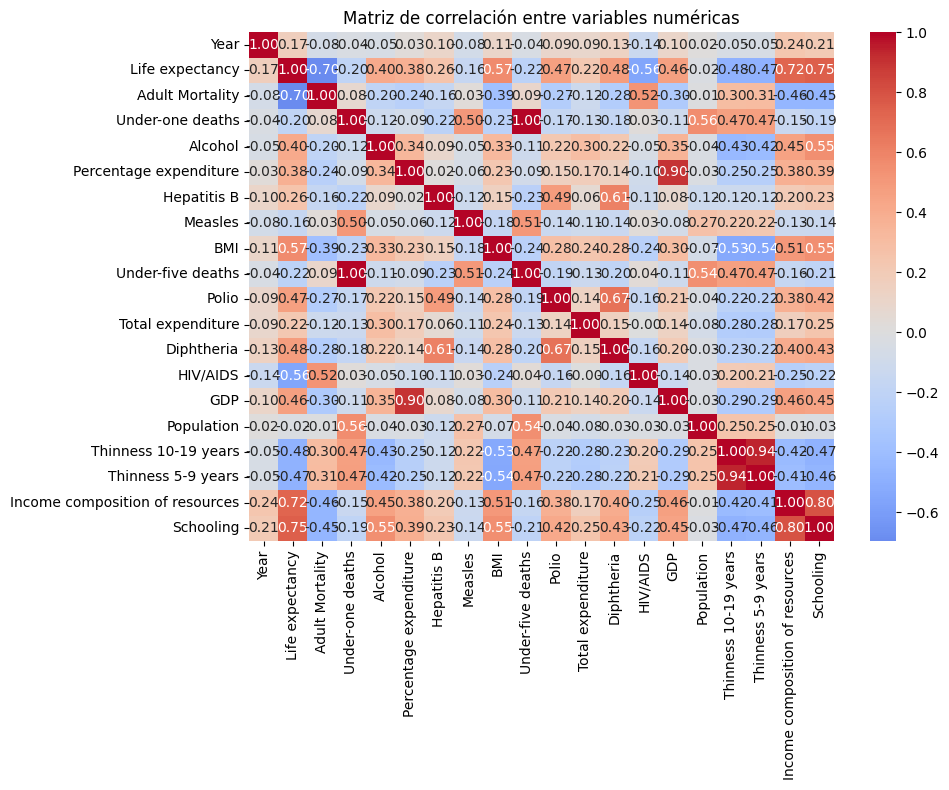

In [ ]:
# No necesita modificar esta celda
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

In [ ]:
# Realice la selección de las columnas que crea conveniente
# COMPLETAR

cols_to_drop_correlation = ['Under-one deaths','Thinness 5-9 years']

df.drop(columns = cols_to_drop_correlation,inplace=True)

**Análisis:**

Eliminaremos la columna de Under-one deaths ya que se desea estimar la esperanza de vida, y para ese caso es mejor evaluar la columna de Under-five deaths.

A parte de que Under-five deaths implica -> Under-one deaths -> correlacion = 1.

De la misma forma se observa que la mayoria de niños que presentan delgadez entre los 5 y 9 años, tienden a seguir presentandolo entre 10 y 19 años -> correlación = 0.94.

Eliminaremos la columna de Thinness 5-9 years.

**3)** Analice las columnas que contienen valores faltantes.

In [ ]:
# No necesita modificar esta celda
missing_values = df.isna().sum()[df.isnull().sum() > 0]
missing_percent = (missing_values / len(df)) * 100
print(missing_percent)

Life expectancy                     0.340368
Adult Mortality                     0.340368
Alcohol                             6.603131
Hepatitis B                        18.822328
BMI                                 1.157250
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
GDP                                15.248468
Population                         22.191967
Thinness 10-19 years                1.157250
Thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: float64


**3.1)** Dropee los nulos de la variable objetivo y responda. ¿Por qué se tomó esta decisión? (1 punto)

In [ ]:
# Realizar la eliminación de registros con nulos en la variable target
# COMPLETAR
df.dropna(subset=['Life expectancy'],inplace=True)

**Análisis:** Se dropearon los nulos de la esperanza de vida ya que representan un porcentaje pequeño en comparación a la data. Además, se podría decir que se mantienen los datos lo más fiel posible a la realidad, por lo que el modelo aprendera exclusivamente con datos reales. 


Se eliminan los registros con nulos en 'Life expectancy' porque al no tener el valor real de la variable objetivo, el modelo no puede aprender ni calcular el error. Estos datos no aportan información al entrenamiento.

**3.2)** Ahora, impute el resto de variables con valores faltantes y justifique su elección de método de imputación (1 punto)

In [ ]:
# Realizar la imputación de nulos
# COMPLETAR
100*df.isnull().sum() / df.shape[0]
#df['Alcohol'].hist()
#plt.plot()
#df['Hepatitis B'].hist()
#plt.plot()
#df['Hepatitis B'].hist()
#plt.plot()
#df['BMI'].hist()
#plt.plot()
#df['Polio'].hist()
#plt.plot()
#f['Total expenditure'].hist()
#plt.plot()
#df['Diphtheria'].hist()
#plt.plot()
#df['GDP'].hist()
#plt.plot()
#df['Population'].hist()
#plt.plot()
#df['Thinness 10-19 years'].hist()
#plt.plot()
#df['Income composition of resources'].hist()
#plt.plot()
#df['Schooling'].hist()
#plt.plot()

df = df.fillna(value = {
    'Alcohol':df.Alcohol.mean(),
    'Hepatitis B':df['Hepatitis B'].median(),
    'BMI':df['BMI'].mean(),
    'Polio':df['Polio'].median(),
    'Total expenditure':df['Total expenditure'].median(),
    'Diphtheria':df['Diphtheria'].median(),
    'GDP':df['GDP'].median(),
    'Population':df['Population'].median(),
    'Thinness 10-19 years':df['Thinness 10-19 years'].median(),
    'Income composition of resources':df['Income composition of resources'].mean(),
    'Schooling':df['Schooling'].mean(),
  })


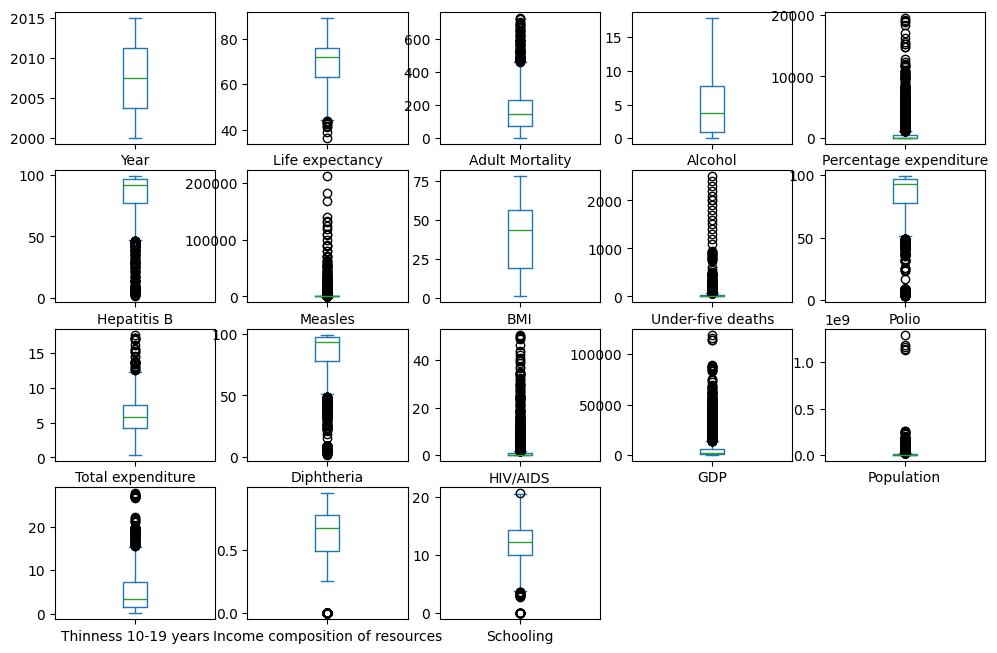

In [ ]:
df.plot(kind='box', subplots=True, layout=(6,5), sharex=True, sharey=False,  figsize=[12,12])
plt.show()

**Análisis:**

**Alcohol**: La distribución no es normal pero tampoco hay tantos outliers. Se prefiere la media.

**Hepatitis B**: La distribución no es normal y hay muchos outliers. Se prefiere la mediana.

**BMI**: La distribución no es normal pero tampoco hay tantos outliers. Se prefiere la media.

**Polio:** La distribución no es normal y hay muchos outliers. Se prefiere la mediana.

**Total expenditure**: La distribución es aproximadamente normal pero hay muchos outliers. Se prefiere la mediana.

**Diphtheria**: La distribución no es normal y hay muchos outliers. Se prefiere la mediana.

**GDP**: La distribución no es normal y hay muchos outliers. Se prefiere la mediana.

**Population**: La distribución es aproximadamente normal pero hay algunos outliers. Se prefiere la mediana.

**Thinness 10-19 years**: La distribución es aproximadamente normal pero hay muchos outliers. Se prefiere la mediana.

**Income composition of resources**: La distribución es aproximadamente normal y no hay tantos outliers. Se prefiere la media.

**Schooling**: La distribución es aproximadamente normal y no hay tantos outliers. Se prefiere la media.



**4)** Analice el código de la siguiente celda y responda. ¿Por qué se está eliminando la columna? (1 punto)

**Tip**: Considere que el objetivo del modelo es predecir la esperanza de vida de cualquier país dado, descrito por sus atributos

In [ ]:
# No modifique esta celda
df = df.drop(['Country'], axis=1)

**Análisis:** Se elimina porque se menciona que el modelo debe ser independiente del país. Por lo que un parámetro de Country no debería afectar en las estimaciones dadas por el modelo.

**5)** Realice la codificación de la variable Status y justifique su elección. (0.5 puntos)

In [ ]:
# Realizar la codificación la variable Status
# COMPLETAR
df.Status.unique()
df = pd.get_dummies(df, columns = ['Status'])

In [ ]:
df.drop(columns = 'Status_Developing')

,Year,Life expectancy,Adult Mortality,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 10-19 years,Income composition of resources,Schooling,Status_Developed
0,2015,65.0,263.0,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,0.479,10.1,False
1,2014,59.9,271.0,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,0.476,10.0,False
2,2013,59.9,268.0,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,0.470,9.9,False
3,2012,59.5,272.0,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,0.463,9.8,False
4,2011,59.2,275.0,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,0.454,9.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,0.407,9.2,False
2934,2003,44.5,715.0,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,0.418,9.5,False
2935,2002,44.8,73.0,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,0.427,10.0,False
2936,2001,45.3,686.0,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,0.427,9.8,False


**RESPUESA:** Status solo tiene 2 valores posibles por lo que se puede usar one hot encoding. Además, no ser desarrollado implica estar en desarrollo.

**6)** Ahora debe realice el split en test y train (Use random_state=42, test_size=0.2) e imprimir los resultados. (0.5 ptos)

In [ ]:
# Separación  del dataset en atributos (X)  y  target (y)
y = df['Life expectancy']   #extrae la variable target
X = df.drop(['Life expectancy'], axis=1)  # extrae las variables de entrada (sin target)

#Realizar la división de los datos en subconjuntos
#x_train,x_test,y_train,y_test = # COMPLETAR
    # proporcion de muestras para validacion
seed = 42   # semilla para el generador aleatorio (para reproductibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Impresión el tamaño del dataset de entrenamiento y de prueba
#print("Tamaño del conjunto de entrenamiento:", ?) # COMPLETAR
#print("Tamaño del conjunto de prueba:", ?) # COMPLETAR
print('Training: %d ejemplos. Test: %d ejemplos' % (len(y_train), len(y_test)))

Training: 2342 ejemplos. Test: 586 ejemplos


# Parte 2: Entrenamiento de algoritmos de regresión y análisis de resultados (7.5 puntos)

In [ ]:
# Definimos el pool de algoritmos de ML a evaluar
algos = []

algos.append(('LinearReg', LinearRegression()))
algos.append(('Ridge', Ridge()))
algos.append(('Lasso', Lasso()))
algos.append(('ElasticNet', ElasticNet()))
algos.append(('KNN_5', KNeighborsRegressor(n_neighbors=5)))
algos.append(('KNN_10', KNeighborsRegressor(n_neighbors=10)))
algos.append(('RegTrees', DecisionTreeRegressor()))
algos.append(('RegTrees_10', DecisionTreeRegressor(max_depth=10)))

**8)** Entrene los modelos almacenados en la lista de algoritmos usando cross validation. Use CV con 10 folds, random_state=42 y scoring='neg_mean_squared_error'. (0.5 puntos)

In [ ]:
# COMPLETAR

# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 42 # COMPLETAR
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

## Evalua cada algoritmo
for algoname, algo in algos:
    cv_results = cross_val_score(algo, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error') # COMPLETAR
    results.append(cv_results)
    names.append(algoname)
    print("{}: {} ({})".format(algoname, cv_results.mean(), cv_results.std()))

LinearReg: -17.588966899851854 (2.2433764213289455)
Ridge: -17.589920528450218 (2.2446516885039265)
Lasso: -18.581079594463052 (2.493424484587687)
ElasticNet: -18.484919264245313 (2.5163663116904154)
KNN_5: -78.70514094344426 (12.371344131293545)
KNN_10: -75.40355502727769 (10.103520238069363)
RegTrees: -7.571086561192945 (1.429590530261442)
RegTrees_10: -7.857203492570763 (1.6480624265850148)


**9)** Observe los boxplots de las metricas evaluadas de los algoritmos en cuestion.

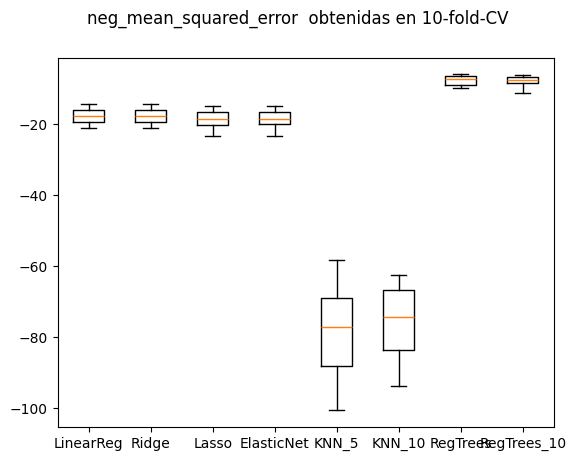

In [ ]:
# No necesita modificar esta celda
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**9.1)** Interprete la gráfica de desempeño (boxplots), ¿qué se puede decir sobre los modelos con mejor desempeño y conjunto de datos trabajado?. Responda considerando el tamaño de los bigotes y la mediana del error cuadrático medio. (2 puntos)

**Respuesta**: Reg trees tiene una mejor media media que los demás algoritmos, además es el que tiene bigotes más estrechos, por lo que se espera que sus resultados no sean muy variables. Esto se refuerza con los valores del neg_mean_squared_error y la desviación estándar, que es la menor en ambos casos comparando todos los algoritmos.

**9.2)** Interprete la gráfica de desempeño (boxplots), ¿a qué puede deber se puede deber el bajo desempeño de algunos modelos?. Considere las características del conjunto de datos y su preprocesamiento (2 puntos)

**Respuesta**: El bajo desempeño de algoritmos como KNN se puede deber a que existen muchos datos numéricos y algunos no estan escalados, por lo que puede haber mayor peso de unos parámetros al calcular las distancias(ya que KNN calcula distancias). Ejemplo: sqrt(x1-x2, y1-y2) si la diferencia de y1-y2 es mucho mayor que x1-x2(por estar a diferente escala), se ignorará practicamente a x1-x2.

**10)** Entrene un modelo final con toda la data de train con el algoritmo elegido. Muestre las metricas obtenidas en el conjunto de test (Mean squared error, Mean absolute error, Explained variance, R2 score). Comente los resultados (1.5 puntos)

In [ ]:
# COMPLETAR

# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de test
model = DecisionTreeRegressor() # COMPLETAR
model.fit(X_train, y_train) # COMPLETAR
y_predicted = model.predict(X_test) # COMPLETAR

print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:",explained_variance_score(y_test, y_predicted) )
print("R2 score:", r2_score(y_test, y_predicted))

Mean squared error: 6.9902730375426625
Mean absolute error: 1.5491467576791809
Explained variance score: 0.9194695132447871
R2 score: 0.9191870365593313


**Respuesta**: Se tiene un error cuadrático medio muy bajo, aproximadamente de 7 y un R2 de 0.92 aproximadamente, lo cual nos indica que es un buen modelo ya que está cercano a 1.

**11)** Analice el scatter plot comparando  los valores reales vs predichos de forma grafica y responda. (1.5 puntos)

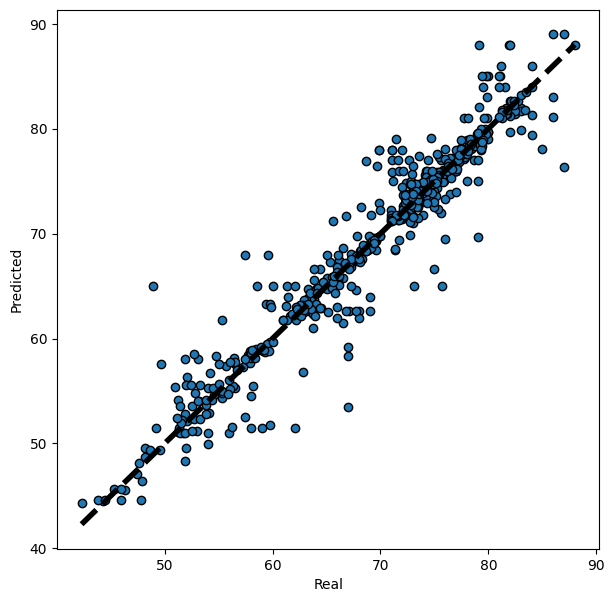

In [ ]:
# No necesita modificar esta celda
fig, ax = plt.subplots( figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

* Observando el gráfico de dispersión, ¿consideras que el modelo proporciona buenas predicciones? ¿Hay alguna tendencia o patrón particular que notes en la dispersión de los puntos?

**Respuesta**: El modelo si proporciona buenas predicciones ya que los datos predichos se ajustan aproximadamente a la realidad en la mayoría de casos, y ademas, comete pocos errores, es decir, no hay muchos valores alejados de la recta.
No hay alguna tendencia o patrón destacable.

# Parte 3: Uso de pipelines y escaladores para mejorar el modelo (6.5 puntos)

Ahora se realizará el entrenamiento de los modelos anteriores utilizando pipelines con un escalador.

In [ ]:
# Definimos el pool de pipleines de ML (escalador + algoritmo de ML) a evaluar
pipelines = []

pipelines.append(('LinearReg', make_pipeline(MinMaxScaler(), LinearRegression())))
pipelines.append(('Ridge', make_pipeline(MinMaxScaler(), Ridge())))
pipelines.append(('Lasso', make_pipeline(MinMaxScaler(), Lasso())))
pipelines.append(('ElasticNet', make_pipeline(MinMaxScaler(), ElasticNet())))
pipelines.append(('KNN_5', make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=5))))
pipelines.append(('KNN_10', make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=10))))
pipelines.append(('RegTrees', make_pipeline(MinMaxScaler(), DecisionTreeRegressor())))
pipelines.append(('RegTrees_10', make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth=10))))

**12)** Entrene los modelos en los pipelines usando cross validation. Use CV con 10 folds, random_state=42 y scoring='neg_mean_squared_error'. (0.5 puntos)

In [ ]:
# COMPLETAR

# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 42 # COMPLETAR
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

## Evalua cada algoritmo
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error') # COMPLETAR
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

LinearReg: -17.58896689987676 (2.24337642133359)
Ridge: -17.573108112783842 (2.279150109624707)
Lasso: -65.28682221020408 (7.066894689019756)
ElasticNet: -70.29375875581323 (7.226649554748321)
KNN_5: -10.812868582651394 (1.2651394856821672)
KNN_10: -12.443947624295328 (2.058159140473584)
RegTrees: -7.467558501545736 (1.2649541507280886)
RegTrees_10: -7.914336596807511 (1.3765221040204039)


**13)** Observe los boxplots de las metricas evaluadas de los algoritmos en cuestion.

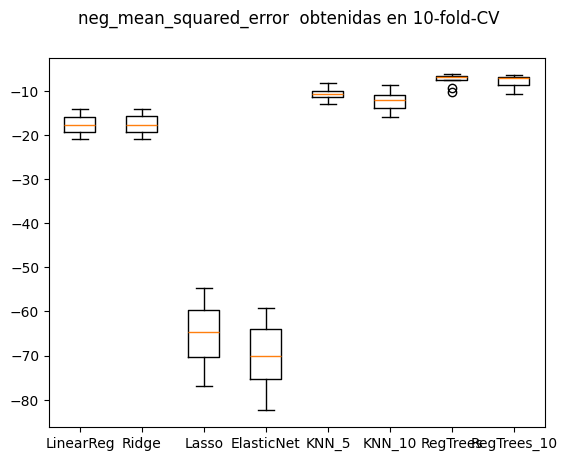

In [ ]:
# No necesita modificar esta celda
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* Interprete la gráfica de desempeño (boxplots) y compare con los resultados de la parte 2, ¿qué se puede decir sobre los escaladores y conjunto de datos trabajado?, ¿cómo ha afectado el escalador a los resultados obtenidos por los modelos? (2 puntos)

**Respuesta**: Como se explicó, un escalamiento ayudó a algoritmos como KNN ya que las distancias estaban en la misma escala y entonces habia menos sesgo por algún parámetro. No obstante Reg Trees sigue siendo mejor, al tener menor error y menor desviación estándar. Para el caso de Lasso y ElasticNet, los resultados han empeorado, por lo que se podría cambiar de escalador.

**14)** Entrene un modelo  final con toda la data de train con el pipeline elegido. Observe las metricas obtenidas en el conjunto de test (Mean squared error, Mean absolute error, Explained variance, R2 score). (0.5 puntos)

In [ ]:
# COMPLETAR

# Reentrena modelo con todos los datos de entrenamiento y lo prueba en el conjunto de test
pipeline = make_pipeline(MinMaxScaler(), DecisionTreeRegressor()) # COMPLETAR
pipeline.fit(X_train, y_train) # COMPLETAR

y_predicted = pipeline.predict(X_test) # COMPLETAR

print("Mean squared error:", mean_squared_error(y_test, y_predicted))
print("Mean absolute error:", mean_absolute_error(y_test, y_predicted))
print("Explained variance score:",explained_variance_score(y_test, y_predicted) )
print("R2 score:", r2_score(y_test, y_predicted))

Mean squared error: 6.748583617747441
Mean absolute error: 1.5622866894197949
Explained variance score: 0.9223731067075367
R2 score: 0.9219811532041332


**15)** Observe el gráfico de dispersión que compara los valores reales vs predichos.

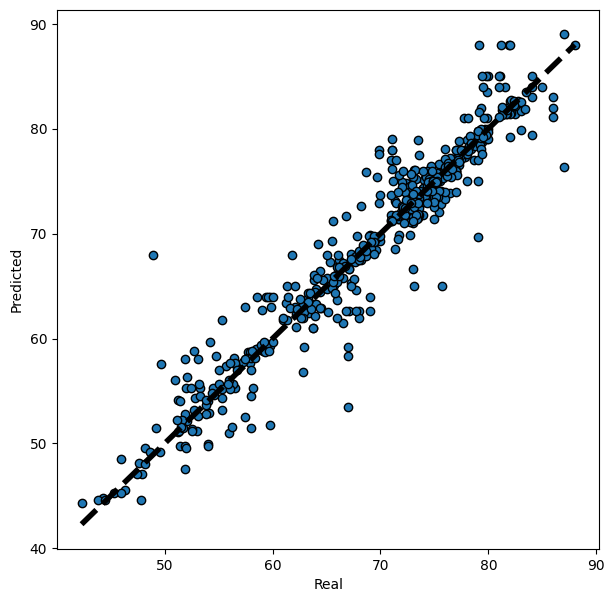

In [ ]:
# No necesita modificar esta celda
fig, ax = plt.subplots(figsize=[7,7])
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

* Comente las diferencias en el resultados respecto a la parte 2. ¿Cuál modelo seleccionaría? (1.5 puntos)

**Respuesta**: Usaría el modelo escalado ya que se ajusta mejor a los datos reales con un R2 mayor al de la parte 2. Además en el gráfico se observa que los datos están un poco menos dispersos que en el gráfico de la parte 2.

**16)** Sugiera **dos** mejoras que podría realizar (en procesamiento y/o algoritmos) para mejorar las predicciones de los modelos y sustente sus elecciones (2 puntos)

In [ ]:
# Definimos el pool de pipleines de ML (escalador + algoritmo de ML) a evaluar
pipelines = []

pipelines.append(('LinearReg', make_pipeline(MinMaxScaler(), LinearRegression())))
pipelines.append(('Ridge', make_pipeline(MinMaxScaler(), Ridge())))
pipelines.append(('Lasso', make_pipeline(StandardScaler(), Lasso())))
pipelines.append(('ElasticNet', make_pipeline(StandardScaler(), ElasticNet())))
pipelines.append(('KNN_5', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))))
pipelines.append(('KNN_10', make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=3))))
pipelines.append(('RegTrees', make_pipeline(MinMaxScaler(), DecisionTreeRegressor())))
pipelines.append(('RegTrees_10', make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth=12))))

In [ ]:
# COMPLETAR

# Evaluamos cada algoritmo de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 42 # COMPLETAR
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

## Evalua cada algoritmo
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error') # COMPLETAR
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

LinearReg: -17.58896689987676 (2.24337642133359)
Ridge: -17.573108112783842 (2.279150109624707)
Lasso: -20.665156516637143 (3.3747851336704198)
ElasticNet: -20.94534768379427 (3.072623385723104)
KNN_5: -9.077016544826332 (1.0786715163205225)
KNN_10: -8.71032957103312 (1.0475379155379214)
RegTrees: -7.660308419712675 (1.655855423924806)
RegTrees_10: -7.548652215232096 (1.3210142335031905)


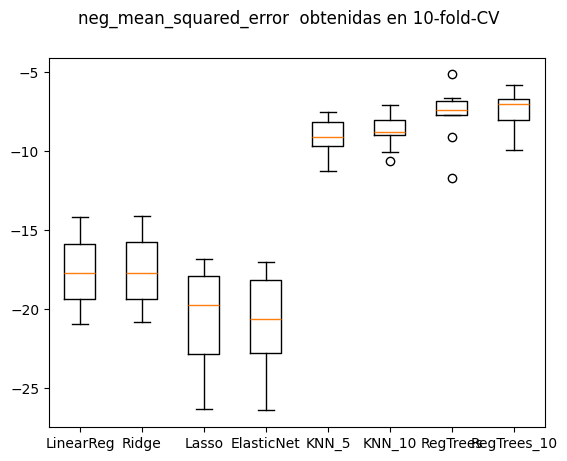

In [ ]:
# No necesita modificar esta celda
fig = plt.figure()
fig.suptitle('neg_mean_squared_error  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Respuesta**:

1. Cambiar de escaladores, se realizó una prueba en la parte superior cambiando MinMax por StandardScaler para KNN, y tambien se cambió MinMaxEscaler por StandardScaler en Lasso y ElasticNet, obteniendo mejores resultados (aunque para Lasso y ElasticNet era mejor sin escaladores), esto de debe a la distribución de los datos y es por eso que debemos probar para obtener los mejores resultados.
2. Modificar los parámetros de los algoritmos, como n_neighbors de KNN y max_depth de Reg tree, con lo cual se pueden obtener mejores ajustes de parámetros. En el caso de Reg trees por ejemplo, cierto nivel de profundidad puede tener un mejor conjunto para asociar durante la predicción, mientras que KNN puede tener más o menos vecinos con los cuales calcular distancias y encontrar similitudes.